In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100 # days

In [3]:
N0y = 100
I0y = 5
R0y = 0
S0y = N0y - I0y - R0y
betay = 0.4 # infection rate
gammay = 0.3 # recovery rate

In [4]:
N0a = 900
I0a = 5
R0a = 0
S0a = N0a - I0a - R0a
betaa = 0.2 # infection rate
gammaa = 0.1 # recovery rate

In [5]:
dt = 0.001
t = np.linspace(0, T, int(T/dt) + 1)

In [6]:
def sy(S, I):
    return -betay*S*I

def iy(S, I):
    return betay*S*I - gammay*I

def ry(S, I):
    return gammay*I

# Estimate by Runge-Kutta Method
Sy_rk = np.zeros(len(t))
Sy_rk[0] = S0y

Iy_rk = np.zeros(len(t))
Iy_rk[0] = I0y

Ry_rk = np.zeros(len(t))
Ry_rk[0] = R0y

for it in range(1, len(t)):    
    xk1 = sy(Sy_rk[it-1], Iy_rk[it-1])
    yk1 = iy(Sy_rk[it-1], Iy_rk[it-1])
    zk1 = ry(Sy_rk[it-1], Iy_rk[it-1])
    xk2 = sy(Sy_rk[it-1] + xk1 * dt/2, Iy_rk[it-1] + yk1 * dt/2)
    yk2 = iy(Sy_rk[it-1] + xk1 * dt/2, Iy_rk[it-1] + yk1 * dt/2)
    zk2 = ry(Sy_rk[it-1] + xk1 * dt/2, Iy_rk[it-1] + yk1 * dt/2)
    xk3 = sy(Sy_rk[it-1] + xk2 * dt/2, Iy_rk[it-1] + yk2 * dt/2)
    yk3 = iy(Sy_rk[it-1] + xk2 * dt/2, Iy_rk[it-1] + yk2 * dt/2)
    zk3 = ry(Sy_rk[it-1] + xk2 * dt/2, Iy_rk[it-1] + yk2 * dt/2)
    xk4 = sy(Sy_rk[it-1] + xk3 * dt, Iy_rk[it-1] + yk3 * dt)
    yk4 = iy(Sy_rk[it-1] + xk3 * dt, Iy_rk[it-1] + yk3 * dt)
    zk4 = ry(Sy_rk[it-1] + xk3 * dt, Iy_rk[it-1] + yk3 * dt)

    Sy_rk[it] = Sy_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    Iy_rk[it] = Iy_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    Ry_rk[it] = Ry_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)
    # Ry_rk[it] = N0 - Sy_rk[it] - Iy_rk[it]

In [7]:
def sa(S, I):
    return -betay*S*I

def ia(S, I):
    return betay*S*I - gammay*I

def ra(S, I):
    return gammay*I

# Estimate by Runge-Kutta Method
Sa_rk = np.zeros(len(t))
Sa_rk[0] = S0a

Ia_rk = np.zeros(len(t))
Ia_rk[0] = I0a

Ra_rk = np.zeros(len(t))
Ra_rk[0] = R0a

for it in range(1, len(t)):    
    xk1 = sa(Sa_rk[it-1], Ia_rk[it-1])
    yk1 = ia(Sa_rk[it-1], Ia_rk[it-1])
    zk1 = ra(Sa_rk[it-1], Ia_rk[it-1])
    xk2 = sa(Sa_rk[it-1] + xk1 * dt/2, Ia_rk[it-1] + yk1 * dt/2)
    yk2 = ia(Sa_rk[it-1] + xk1 * dt/2, Ia_rk[it-1] + yk1 * dt/2)
    zk2 = ra(Sa_rk[it-1] + xk1 * dt/2, Ia_rk[it-1] + yk1 * dt/2)
    xk3 = sa(Sa_rk[it-1] + xk2 * dt/2, Ia_rk[it-1] + yk2 * dt/2)
    yk3 = ia(Sa_rk[it-1] + xk2 * dt/2, Ia_rk[it-1] + yk2 * dt/2)
    zk3 = ra(Sa_rk[it-1] + xk2 * dt/2, Ia_rk[it-1] + yk2 * dt/2)
    xk4 = sa(Sa_rk[it-1] + xk3 * dt, Ia_rk[it-1] + yk3 * dt)
    yk4 = ia(Sa_rk[it-1] + xk3 * dt, Ia_rk[it-1] + yk3 * dt)
    zk4 = ra(Sa_rk[it-1] + xk3 * dt, Ia_rk[it-1] + yk3 * dt)

    Sa_rk[it] = Sa_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    Ia_rk[it] = Ia_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    Ra_rk[it] = Ra_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)
    # Ra_rk[it] = N0 - Sa_rk[it] - Ia_rk[it]

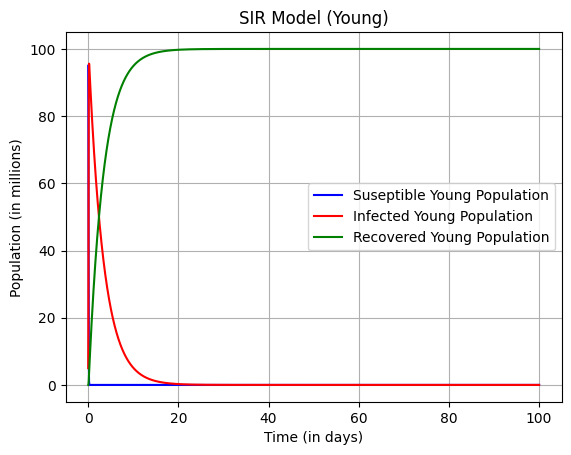

In [8]:
plt.plot(t, Sy_rk, label='Suseptible Young Population', color='blue')
plt.plot(t, Iy_rk, label='Infected Young Population', color='red')
plt.plot(t, Ry_rk, label='Recovered Young Population', color='green')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('SIR Model (Young)')
plt.legend()
plt.grid()

plt.show()

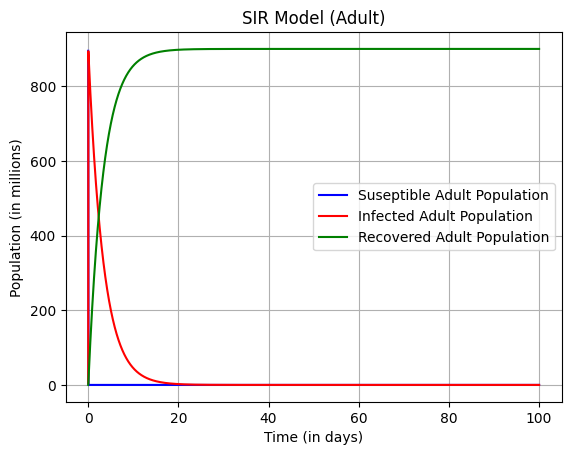

In [9]:
plt.plot(t, Sa_rk, label='Suseptible Adult Population', color='blue')
plt.plot(t, Ia_rk, label='Infected Adult Population', color='red')
plt.plot(t, Ra_rk, label='Recovered Adult Population', color='green')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('SIR Model (Adult)')
plt.legend()
plt.grid()

plt.show()